<a href="https://colab.research.google.com/github/truc-h-nguyen/Toddler-activity-suggestions/blob/main/Simple_MNIST_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Link](https://keras.io/examples/vision/mnist_convnet/)

[source code?](https://github.com/keras-team/keras/blob/master/keras/datasets/mnist.py)

[Example](https://notebook.community/strikingmoose/chi_lars_face_detection/notebook/3%20-%20TFlearn%20%26%20MNIST)

In [ ]:
#Setup
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

We prepare model/data parameters.

Number of classes is 10???

Image input is presented as 1D array with 28 rows and 28 columns.

In [ ]:
#Prepare Data
# Model / data parameters
num_classes = 10 
input_shape = (28, 28, 1) #every image is represented as a 28 × 28 array

We load the keras MNIST data set and split the dataset into train and test sets.

We then examine the features' shape. 

For the test set, we have 10,000 samples, and each image has 28 rows and 28 columns.

For the train set, we have 60,000 samples, and each image also has 28 rows and 28 columns.

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("x_test shape:" , x_test.shape)
print("x_train shape:", x_train.shape)

x_test shape: (10000, 28, 28)
x_train shape: (60000, 28, 28)


Observe some y values from train and test set (for fun):

In [ ]:
for yitrain in range(9):
  print(y_train[yitrain])

5
0
4
1
9
2
1
3
1


In [ ]:
for yitest in range(9):
  print(y_test[yitest])

7
2
1
0
4
1
4
9
5


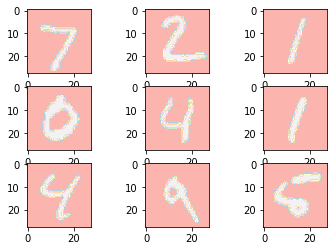

In [ ]:
#images in test set
index=0
for nrows in range(3):
  for ncols in range(3):
    plt.subplot(3,3,index+1)
    plt.imshow(x_test[index], cmap="Pastel1")
    index+=1
    plt.show

We load the first image of training set.

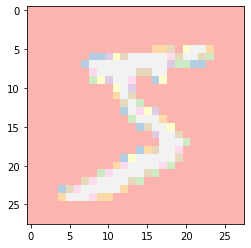

In [ ]:
# Get first image of training set
x_first = x_train[0]
plt.imshow(x_first, cmap='Pastel1')
plt.show()

In [ ]:
x_first

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Plot first few images in train set.

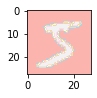

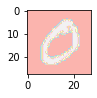

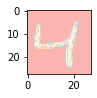

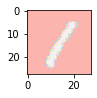

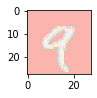

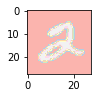

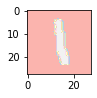

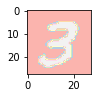

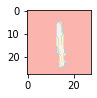

In [ ]:
n_rows = 3
n_cols = 3
i=0
for row in range(n_rows):
  for col in range(n_cols):
    plt.subplot(n_rows,n_cols,i+1)
    plt.imshow(x_train[i], cmap='Pastel1')
    i+=1
    plt.show()

Scale pixel intensities down to range 0-1 by dividing 255.

In [ ]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255 #the pixel intensities are represented as floats from 0.0 to 255.0 => so we divide by 255
x_test = x_test.astype("float32") / 255

Convert input image to 1D array.

For each image, we have 28 rows, 28 columns, and 1 element for each row and each column.

In [ ]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1) #the new axis will be placed at index = -1 of the NEW shape
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
#number of samples in train and test set
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")
x_first = x_train[0]
x_first

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [ ]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes) #num_classes = 10
y_test = keras.utils.to_categorical(y_test, num_classes)

We have the first output value in train set is 5, and the code converts the number 5 into binary values. 

It does the same things for other ouput values.

In [ ]:
y_train[0] 

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Create a model using [Sequential API](https://keras.io/guides/sequential_model/)

Guide for [dropout](https://www.machinecurve.com/index.php/2019/12/18/how-to-use-dropout-with-keras/)

Output shape???


In [ ]:
#build a model
model = keras.Sequential( #Create Sequential model
    [
        keras.Input(shape=input_shape),#1st layer should include input shape. "Layers in Keras need to know the shape of their inputs in order to be able to create their weights."
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),# 2nd layer: use the ReLU (rectified linear unit) activation function
        layers.MaxPooling2D(pool_size=(2, 2)),# "a stack of Conv2D and MaxPooling2D layers is downsampling image feature maps"
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),#ink the convolutional layers with the Dense ones
        layers.Dropout(0.5),#avoid overfitting, determine the odd of dropping out neurons
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

Compilation and training:

[Categorical crossentropy loss](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy) to determine the difference between prediction and actual target.



In [23]:
#train a model
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 45s 104ms/step - loss: 0.3791 - accuracy: 0.8825 - val_loss: 0.0811 - val_accuracy: 0.9755
Epoch 2/15
422/422 [==============================] - 44s 104ms/step - loss: 0.1169 - accuracy: 0.9643 - val_loss: 0.0573 - val_accuracy: 0.9843
Epoch 3/15
422/422 [==============================] - 44s 104ms/step - loss: 0.0886 - accuracy: 0.9725 - val_loss: 0.0474 - val_accuracy: 0.9857
Epoch 4/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0755 - accuracy: 0.9767 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 5/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0647 - accuracy: 0.9794 - val_loss: 0.0373 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.0382 - val_accuracy: 0.9893
Epoch 7/15
422/422 [==============================] - 45s 106ms/step - loss: 0.0555 - accuracy: 0.9831 - val_loss: 0.0366 - val_ac

In [24]:
#Evaluate the trained model
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.024875406175851822
Test accuracy: 0.9921000003814697


Check if we have the model is overfitting the training set??